In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/hari/Downloads/Maternal Health Risk Data Set.csv.xls')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
data = df.dropna()

In [4]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


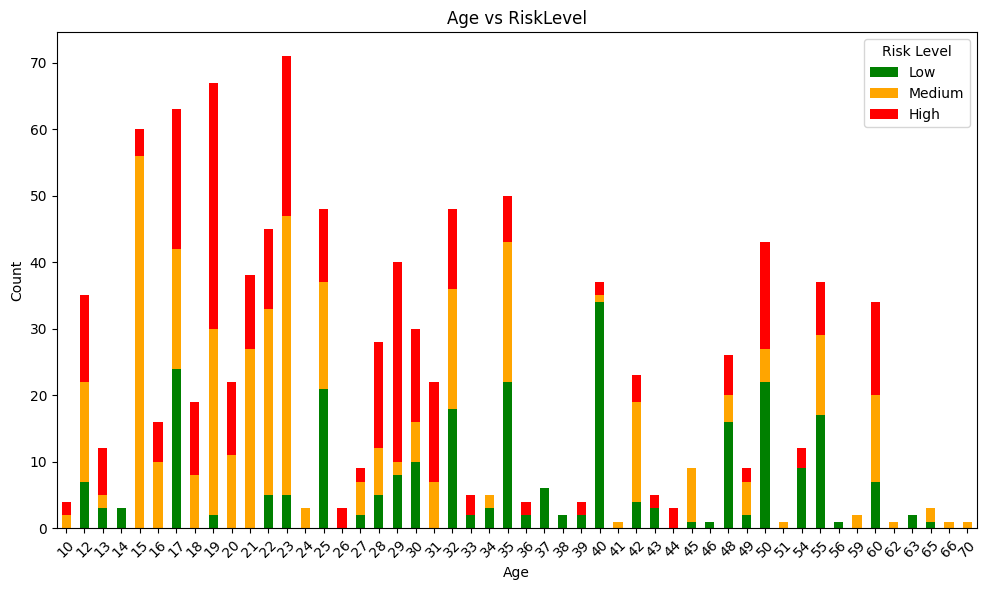

In [5]:
age_RiskLevel = data.groupby(['Age','RiskLevel']).size().unstack(fill_value=0)
age_RiskLevel.plot(kind='bar',stacked=True,figsize = [10,6],color = ['green','orange','red'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs RiskLevel')
plt.legend(title='Risk Level', labels=['Low', 'Medium', 'High'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

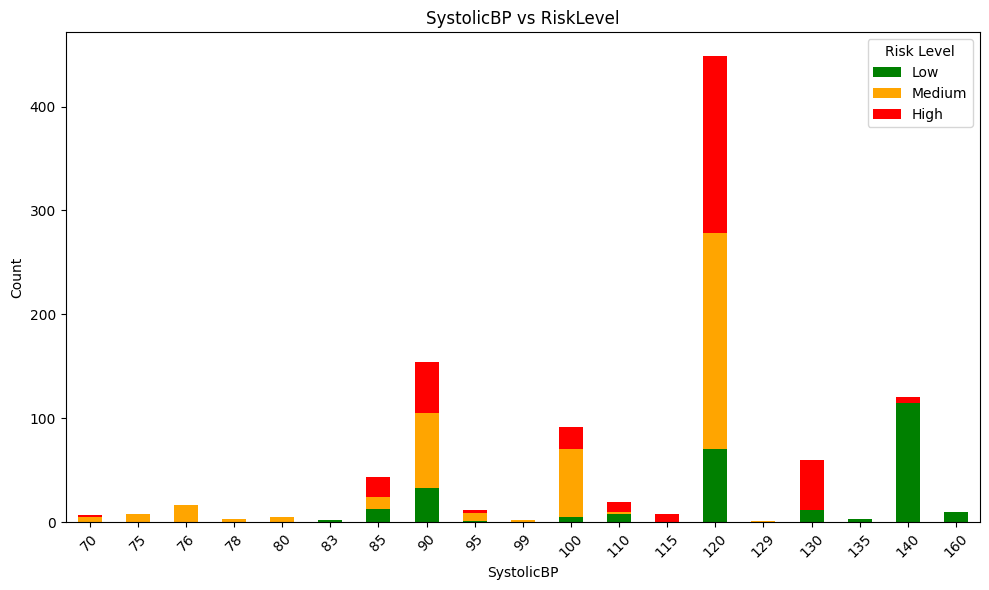

In [6]:
sysBP_RiskLevel = data.groupby(['SystolicBP', 'RiskLevel']).size().unstack(fill_value=0)
sysBP_RiskLevel.plot(kind='bar',stacked =True,figsize=[10,6],color=['green','orange','red'])
plt.xlabel('SystolicBP')
plt.ylabel('Count')
plt.title('SystolicBP vs RiskLevel')
plt.legend(title='Risk Level', labels=['Low', 'Medium', 'High'])
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

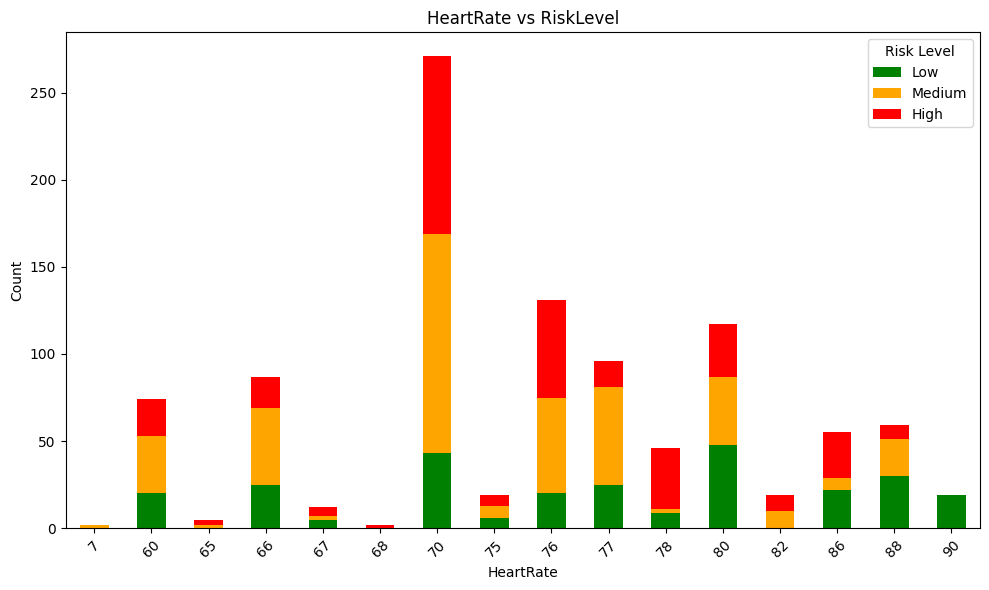

In [7]:
HeartRate_RiskLevel = data.groupby(['HeartRate','RiskLevel']).size().unstack(fill_value=0)
HeartRate_RiskLevel.plot(kind = 'bar',stacked = True,figsize=[10,6],color=['green','orange','red'])
plt.xlabel('HeartRate')
plt.ylabel('Count')
plt.title('HeartRate vs RiskLevel')
plt.legend(title='Risk Level', labels=['Low', 'Medium', 'High'])
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

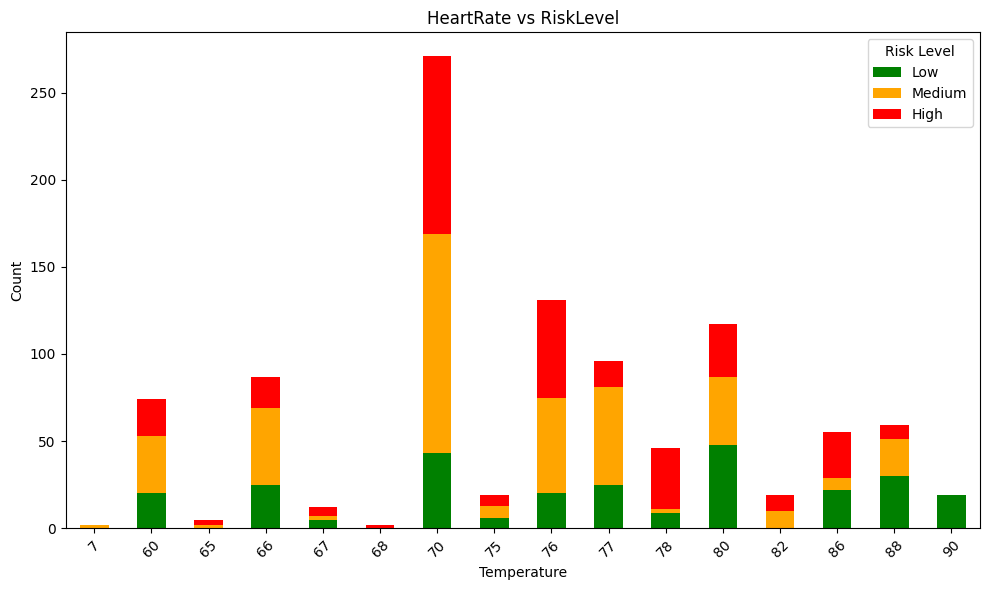

In [8]:
Temp_RiskLevel = data.groupby(['BodyTemp','RiskLevel']).size().unstack(fill_value=0)
HeartRate_RiskLevel.plot(kind = 'bar',stacked = True,figsize=[10,6],color=['green','orange','red'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('HeartRate vs RiskLevel')
plt.legend(title='Risk Level', labels=['Low', 'Medium', 'High'])
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

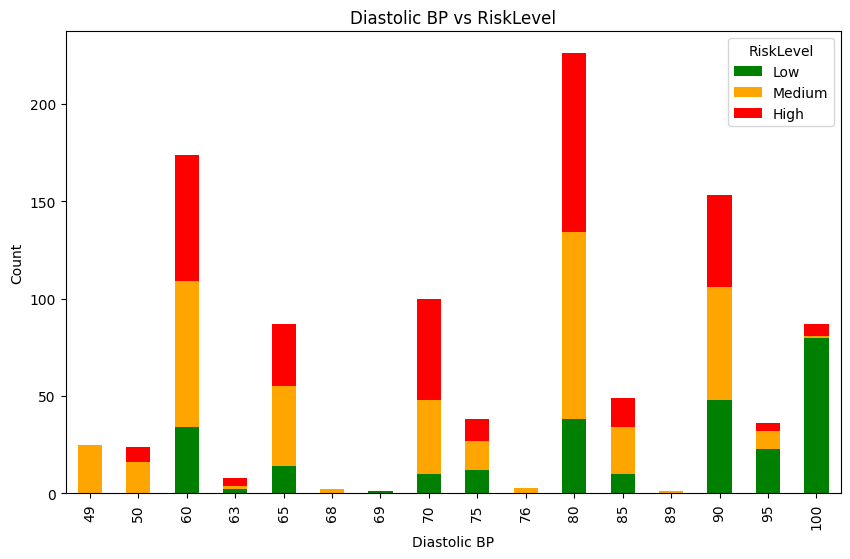

In [9]:
DiastolicBP_RiskLevel = data.groupby(['DiastolicBP','RiskLevel']).size().unstack(fill_value=0)
DiastolicBP_RiskLevel.plot(kind='bar',stacked=True,figsize=[10,6],color=["green",'orange','red'])
plt.xlabel('Diastolic BP')
plt.ylabel('Count')
plt.legend(title='RiskLevel',labels=['Low','Medium','High'])
plt.title("Diastolic BP vs RiskLevel")
plt.show()

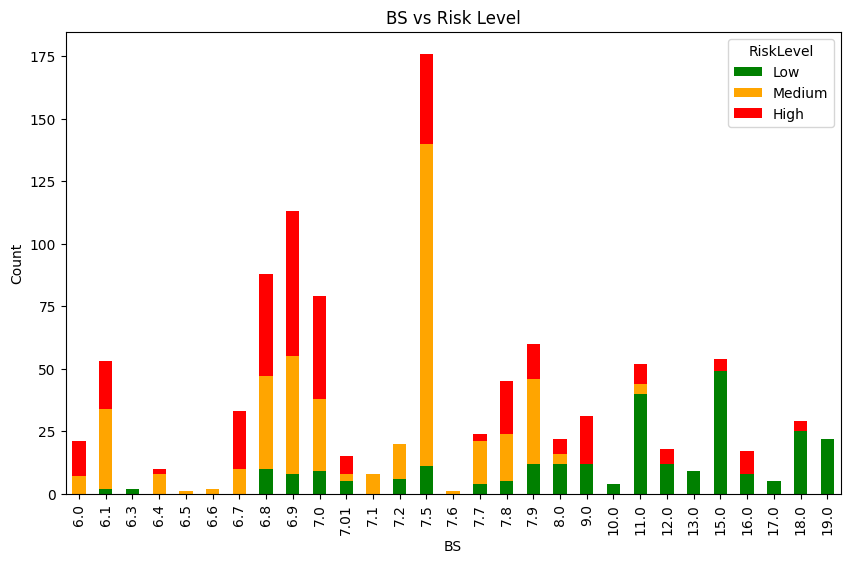

In [10]:
Bs_Risklevel = data.groupby(['BS','RiskLevel']).size().unstack(fill_value=0)
Bs_Risklevel.plot(kind='bar',stacked =True,figsize=[10,6],color=['green','orange','red'])
plt.xlabel('BS')
plt.ylabel('Count')
plt.legend(title='RiskLevel',labels=['Low','Medium','High'])
plt.title('BS vs Risk Level')
plt.show()

In [11]:
risk_level_map = {'high risk':2,'mid risk':1,'low risk':0}
data['RiskLevel'] = data['RiskLevel'].map(risk_level_map)

In [12]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


# Co-Relation matrix

In [13]:
import seaborn as sns

In [14]:
corr_data = data.corr()

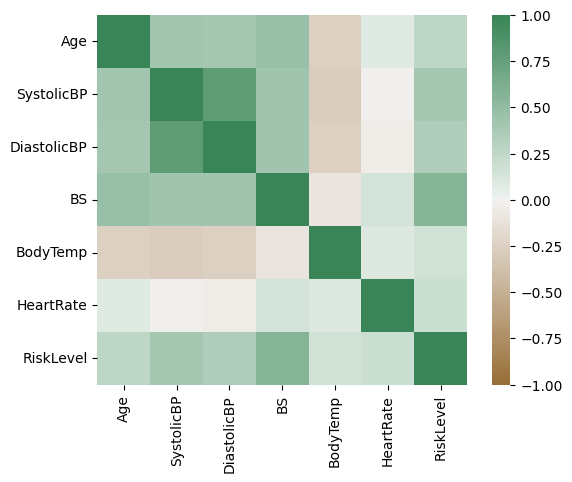

In [15]:
axis_corr = sns.heatmap(
corr_data,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

In [16]:
corr_matrix = round(data.corr(),2)
print(corr_matrix)


              Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  \
Age          1.00        0.42         0.40  0.47     -0.26       0.08   
SystolicBP   0.42        1.00         0.79  0.43     -0.29      -0.02   
DiastolicBP  0.40        0.79         1.00  0.42     -0.26      -0.05   
BS           0.47        0.43         0.42  1.00     -0.10       0.14   
BodyTemp    -0.26       -0.29        -0.26 -0.10      1.00       0.10   
HeartRate    0.08       -0.02        -0.05  0.14      0.10       1.00   
RiskLevel    0.27        0.40         0.35  0.57      0.16       0.19   

             RiskLevel  
Age               0.27  
SystolicBP        0.40  
DiastolicBP       0.35  
BS                0.57  
BodyTemp          0.16  
HeartRate         0.19  
RiskLevel         1.00  
